In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.997
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.997_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.997.csv", delimiter=" ")

print(menor.shape)

(5971, 4)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []

for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   
    
    
    

0 test error: 0.0013275922491813642
1 test error: 0.0008496876770968276
2 test error: 0.0029646022551089737
3 test error: 0.0025211595841430874
4 test error: 0.0015092547113718508
5 test error: 0.0016835180450537129
6 test error: 0.0025387994255233457
7 test error: 0.0010605468280221204
8 test error: 0.0030969876709718625
9 test error: 0.002636174223146621
10 test error: 0.003252159174729101
11 test error: 0.001104963371530318
12 test error: 0.0036081803539068217
13 test error: 0.0056871309192615726
14 test error: 0.022851007713316027
15 test error: 0.004975824810777201
16 test error: 0.032945676899221364
17 test error: 0.005742118471108703
18 test error: 0.0009927869303753844
19 test error: 0.0008829759076777994
20 test error: 0.0030620124364796617
21 test error: 0.0015219116885644098
22 test error: 0.002495212339785433
23 test error: 0.0019124874446596256
24 test error: 0.005329324952140076
25 test error: 0.0012455613957416724
26 test error: 0.0023145240934586996
27 test error: 0.002

223 test error: 0.0016896459369589848
224 test error: 0.008464957977273757
225 test error: 0.0023170096027748835
226 test error: 0.0016396981912456538
227 test error: 0.0023279463758561704
228 test error: 0.0012901747387891154
229 test error: 0.0017257337621411006
230 test error: 0.001617377178466239
231 test error: 0.003830211318292592
232 test error: 0.003012659899618397
233 test error: 0.0039959718143535855
234 test error: 0.016731405456764704
235 test error: 0.0009527300044546687
236 test error: 0.0017595664711340467
237 test error: 0.0006644719984989367
238 test error: 0.0009623469080765217
239 test error: 0.001577619899751233
240 test error: 0.0026399665080785463
241 test error: 0.00489797135890852
242 test error: 0.0027301278380830315
243 test error: 0.002910220764213577
244 test error: 0.002766804898038035
245 test error: 0.00136825838093056
246 test error: 0.0021210574760404297
247 test error: 0.013533213974996738
248 test error: 0.0011424954735954193
249 test error: 0.0034041

442 test error: 0.012444713329472144
443 test error: 0.0007282012685895545
444 test error: 0.0008748467636015455
445 test error: 0.004336583876051203
446 test error: 0.0005984972193348805
447 test error: 0.010156895368816964
448 test error: 0.0029637909646116557
449 test error: 0.0010262588156686903
450 test error: 0.0023863006359951273
451 test error: 0.0007645049585309167
452 test error: 0.0019993143387051944
453 test error: 0.0027319789822751223
454 test error: 0.0009875909615404037
455 test error: 0.0012687139685555696
456 test error: 0.0024436710700333824
457 test error: 0.005481830140779953
458 test error: 0.004756255424126447
459 test error: 0.00680919880311714
460 test error: 0.002612090689474725
461 test error: 0.0007526407683178525
462 test error: 0.005470049009381997
463 test error: 0.0020532899141352417
464 test error: 0.003099697325683117
465 test error: 0.0030011916061494235
466 test error: 0.0014037004128167596
467 test error: 0.002076492103084215
468 test error: 0.00206

661 test error: 0.001287002998532751
662 test error: 0.0020564145113545224
663 test error: 0.004147591677713671
664 test error: 0.003173360842498213
665 test error: 0.0025817818682748596
666 test error: 0.0020758175520424493
667 test error: 0.0017470806518247585
668 test error: 0.0024820534233978443
669 test error: 0.0024815183842172815
670 test error: 0.00218983910412758
671 test error: 0.008106564305109816
672 test error: 0.001956093313568042
673 test error: 0.0027874502918138165
674 test error: 0.002693006482809724
675 test error: 0.014987713306024213
676 test error: 0.0013698551509751962
677 test error: 0.0013679749439660003
678 test error: 0.002373125572370527
679 test error: 0.007689347830924469
680 test error: 0.0031435835431324185
681 test error: 0.0011128567186725112
682 test error: 0.0021304691506095113
683 test error: 0.0020755125514683075
684 test error: 0.0018981136614052872
685 test error: 0.002699326561748876
686 test error: 0.0006517181269996743
687 test error: 0.000944

883 test error: 0.0011630188092869073
884 test error: 0.004683212402628676
885 test error: 0.0012524987703702783
886 test error: 0.0023945366364277842
887 test error: 0.0009920770469158133
888 test error: 0.0012812667631384768
889 test error: 0.001312084456995249
890 test error: 0.004242322387997105
891 test error: 0.010746317254380909
892 test error: 0.0035234353353292064
893 test error: 0.0014573961456612985
894 test error: 0.003108124854684492
895 test error: 0.0034013326809027864
896 test error: 0.002685563696373335
897 test error: 0.0019418657316604862
898 test error: 0.0025478085244409446
899 test error: 0.0037099247375069707
900 test error: 0.005777254511771984
901 test error: 0.0016062084889878522
902 test error: 0.003252044372777873
903 test error: 0.0008403739780861669
904 test error: 0.00810117499022014
905 test error: 0.03529068179527383
906 test error: 0.0049103732241194634
907 test error: 0.004997225228211941
908 test error: 0.003574706057180008
909 test error: 0.00153343

1100 test error: 0.0032780699577278677
1101 test error: 0.0023118267404431967
1102 test error: 0.0061417805274414945
1103 test error: 0.0024638093031705438
1104 test error: 0.0027100270908768194
1105 test error: 0.0010354794982508225
1106 test error: 0.008625694236523592
1107 test error: 0.00184262249046829
1108 test error: 0.002547848514248965
1109 test error: 0.009706158696632713
1110 test error: 0.002022609566647118
1111 test error: 0.0014229143813009716
1112 test error: 0.0052313016247576005
1113 test error: 0.0035121817276178875
1114 test error: 0.001291106385976684
1115 test error: 0.0012098843709746924
1116 test error: 0.0024600092342429796
1117 test error: 0.0030017980329322606
1118 test error: 0.002038522022113223
1119 test error: 0.001958943801607373
1120 test error: 0.001747848181228341
1121 test error: 0.0025452993333529125
1122 test error: 0.004683368497954761
1123 test error: 0.003229593599696724
1124 test error: 0.001427276119486081
1125 test error: 0.0009755861876830428

1314 test error: 0.004028342061879572
1315 test error: 0.001050530977867708
1316 test error: 0.0027228179766095044
1317 test error: 0.0021200743308627625
1318 test error: 0.003391457239753584
1319 test error: 0.0006837656764970947
1320 test error: 0.007222538148976069
1321 test error: 0.0013779493124179718
1322 test error: 0.0021907312089024774
1323 test error: 0.003848708097439618
1324 test error: 0.010829036669511597
1325 test error: 0.009026019743798705
1326 test error: 0.0033147847988761617
1327 test error: 0.001145971680531403
1328 test error: 0.0006960290282459371
1329 test error: 0.0020521308255969767
1330 test error: 0.00240022742832582
1331 test error: 0.0027780633724465965
1332 test error: 0.0012990364376506813
1333 test error: 0.0013607741063588902
1334 test error: 0.012997451567894586
1335 test error: 0.0033123563825247066
1336 test error: 0.00199624978801541
1337 test error: 0.0020995652580220597
1338 test error: 0.0024294337624725785
1339 test error: 0.07091611627475186
1

1527 test error: 0.013548296842559902
1528 test error: 0.0019465821648273873
1529 test error: 0.001277799019671056
1530 test error: 0.0019284721981555637
1531 test error: 0.029565658666252992
1532 test error: 0.0019279549880140772
1533 test error: 0.003208538420685519
1534 test error: 0.0013338926773511204
1535 test error: 0.00208161461032102
1536 test error: 0.007937560797157978
1537 test error: 0.003174229067760595
1538 test error: 0.0018677796517581069
1539 test error: 0.0012083662340624157
1540 test error: 0.0022641733757750504
1541 test error: 0.0012027502938077473
1542 test error: 0.0024308684782584533
1543 test error: 0.0008874592145025177
1544 test error: 0.005607098426091343
1545 test error: 0.0020391414731205796
1546 test error: 0.0028013658337469206
1547 test error: 0.0008628423108693787
1548 test error: 0.005593041228935326
1549 test error: 0.000815366011478298
1550 test error: 0.001552518552641432
1551 test error: 0.001451131484484939
1552 test error: 0.0004829588716761759

1740 test error: 0.0011020454260219864
1741 test error: 0.0023864827860201306
1742 test error: 0.002420307637940907
1743 test error: 0.0013425905485977031
1744 test error: 0.0031726228728537337
1745 test error: 0.0018262183428380677
1746 test error: 0.0017707715164825325
1747 test error: 0.002612947645545748
1748 test error: 0.0011745085149075238
1749 test error: 0.004086999644503976
1750 test error: 0.00668371042028232
1751 test error: 0.0015828236707777564
1752 test error: 0.00613218622623072
1753 test error: 0.002615471248094561
1754 test error: 0.002878530395849694
1755 test error: 0.0032119249320703615
1756 test error: 0.0055721035656547254
1757 test error: 0.01926678477340927
1758 test error: 0.0015208143258753112
1759 test error: 0.0012291838076964486
1760 test error: 0.007345237988577897
1761 test error: 0.001731607512837886
1762 test error: 0.0015977469885405423
1763 test error: 0.0025578836424828616
1764 test error: 0.0013058293370191453
1765 test error: 0.0021475916169522657

1954 test error: 0.000657846957694943
1955 test error: 0.003758700779590309
1956 test error: 0.003550200565499656
1957 test error: 0.003923654478777544
1958 test error: 0.003229951497597688
1959 test error: 0.0010752365118786218
1960 test error: 0.003441255953712536
1961 test error: 0.004978753025329847
1962 test error: 0.010761860842347128
1963 test error: 0.0011989446066113215
1964 test error: 0.0013509155099741602
1965 test error: 0.0012837071704190949
1966 test error: 0.0028517012610943166
1967 test error: 0.003636725272032788
1968 test error: 0.0033840794380940904
1969 test error: 0.00750214370427836
1970 test error: 0.003175537572715852
1971 test error: 0.0068004319707094165
1972 test error: 0.006925616982541476
1973 test error: 0.0003808958234341897
1974 test error: 0.002092518128564577
1975 test error: 0.0014140819510733893
1976 test error: 0.0019358235088185523
1977 test error: 0.0028447209990455163
1978 test error: 0.004979637601713435
1979 test error: 0.003062090714634632
19

2168 test error: 0.008084188917125663
2169 test error: 0.0009991536190540285
2170 test error: 0.0007810969884713931
2171 test error: 0.002020579472903858
2172 test error: 0.0035744829829844086
2173 test error: 0.0009093864438106784
2174 test error: 0.0020460237936605957
2175 test error: 0.0009097355370140999
2176 test error: 0.001795225728692697
2177 test error: 0.0019347438158438797
2178 test error: 0.0009049424897069543
2179 test error: 0.0012123433257293847
2180 test error: 0.02761875536515573
2181 test error: 0.0015894687767380087
2182 test error: 0.0027298109282402963
2183 test error: 0.004645948932682209
2184 test error: 0.0029445632841057535
2185 test error: 0.0032473666519427895
2186 test error: 0.008539856121012683
2187 test error: 0.0025385905746670243
2188 test error: 0.0012933372109095813
2189 test error: 0.0034590099510890147
2190 test error: 0.001425714713578418
2191 test error: 0.0027512909960801255
2192 test error: 0.002220319796797555
2193 test error: 0.001907966337378

2381 test error: 0.001700293480412083
2382 test error: 0.002043854797426038
2383 test error: 0.002969627449760292
2384 test error: 0.0017700694311962048
2385 test error: 0.0008504030101050006
2386 test error: 0.0019432207587529657
2387 test error: 0.0008464216731384671
2388 test error: 0.0026251410875548537
2389 test error: 0.002188424800132051
2390 test error: 0.0009232828720378797
2391 test error: 0.005468264686567134
2392 test error: 0.0032686848724381976
2393 test error: 0.00798870070971369
2394 test error: 0.00874658947482103
2395 test error: 0.0009129138639544141
2396 test error: 0.0025733812533604177
2397 test error: 0.0012305158480446557
2398 test error: 0.0034480529653577413
2399 test error: 0.0006603149101092591
2400 test error: 0.003178366782231136
2401 test error: 0.0012409967505646279
2402 test error: 0.00892053141109494
2403 test error: 0.0018886651578480678
2404 test error: 0.00572378112334401
2405 test error: 0.0035839342244826833
2406 test error: 0.0019821065528903923


2596 test error: 0.0010118977963743574
2597 test error: 0.0017182140581794589
2598 test error: 0.0013153391259915906
2599 test error: 0.002778991181601293
2600 test error: 0.0041351100682035435
2601 test error: 0.0020524654586207337
2602 test error: 0.008145646217188234
2603 test error: 0.003914988985171882
2604 test error: 0.0012622474923343731
2605 test error: 0.004236310988862346
2606 test error: 0.003177569023996936
2607 test error: 0.004071250741771785
2608 test error: 0.0017945270284534683
2609 test error: 0.003999224941365577
2610 test error: 0.0006667509308746811
2611 test error: 0.0010777519528965016
2612 test error: 0.001878957891663979
2613 test error: 0.028336465304730878
2614 test error: 0.0008719252490309141
2615 test error: 0.0017967879495202066
2616 test error: 0.003569699427028431
2617 test error: 0.003119452225807294
2618 test error: 0.0015244306020402445
2619 test error: 0.0037934120832390813
2620 test error: 0.0018858289613157232
2621 test error: 0.00161444058999856

2810 test error: 0.002559203636668295
2811 test error: 0.00325209114507262
2812 test error: 0.000941920531376489
2813 test error: 0.0016799056217738147
2814 test error: 0.0012406303270295282
2815 test error: 0.004978772049458304
2816 test error: 0.001288353018083546
2817 test error: 0.004319675874814819
2818 test error: 0.0009302964765988543
2819 test error: 0.00215913413506322
2820 test error: 0.0014580736300004297
2821 test error: 0.004957860704585728
2822 test error: 0.0023193955327348924
2823 test error: 0.0014789672103405918
2824 test error: 0.0011495749432889597
2825 test error: 0.001313050215355594
2826 test error: 0.0021625041025273026
2827 test error: 0.0013266850223960511
2828 test error: 0.02469166258504292
2829 test error: 0.0010856612653313523
2830 test error: 0.0014834719029693613
2831 test error: 0.00915386876135938
2832 test error: 0.0017918454191676154
2833 test error: 0.0017287112542892756
2834 test error: 0.0014969866054134115
2835 test error: 0.006022848701547758
28

3029 test error: 0.0038373341290148374
3030 test error: 0.00311968596000792
3031 test error: 0.0031468553199809285
3032 test error: 0.002713830936248546
3033 test error: 0.0015137113517213938
3034 test error: 0.002033290849507643
3035 test error: 0.003540716913041554
3036 test error: 0.0017797403375234017
3037 test error: 0.003314311322101978
3038 test error: 0.0026068430605921274
3039 test error: 0.0013396658241652424
3040 test error: 0.0028273173070743713
3041 test error: 0.001256222128533475
3042 test error: 0.0013503268434494672
3043 test error: 0.003240922857435676
3044 test error: 0.00522956257748129
3045 test error: 0.001082403350318999
3046 test error: 0.006435453266822552
3047 test error: 0.004825187842175728
3048 test error: 0.0026650357414492293
3049 test error: 0.00217793226896185
3050 test error: 0.00152781983705445
3051 test error: 0.00243293796671016
3052 test error: 0.002206553811984832
3053 test error: 0.003459513282863619
3054 test error: 0.004714805369094284
3055 tes

3243 test error: 0.011580614931190062
3244 test error: 0.0059803211573448735
3245 test error: 0.01551992629461963
3246 test error: 0.0029239903900237243
3247 test error: 0.00263089881525742
3248 test error: 0.0018850729430194223
3249 test error: 0.0026063626029350796
3250 test error: 0.0018159071191728795
3251 test error: 0.0012651861585226863
3252 test error: 0.00296505275242349
3253 test error: 0.00515693224203251
3254 test error: 0.0034919527094225394
3255 test error: 0.0017204694872782359
3256 test error: 0.0027888538784065315
3257 test error: 0.007308897962776463
3258 test error: 0.0008907186448458013
3259 test error: 0.0031018718847287147
3260 test error: 0.0008009094021199204
3261 test error: 0.002151974243659284
3262 test error: 0.001267789788134878
3263 test error: 0.002733776808529238
3264 test error: 0.0013486381736482354
3265 test error: 0.002093664551467131
3266 test error: 0.0016933405100159026
3267 test error: 0.0031321557150975256
3268 test error: 0.0015365552616635177


3458 test error: 0.003849597903184424
3459 test error: 0.0013899971275161095
3460 test error: 0.0012485114251864142
3461 test error: 0.0026449671886291815
3462 test error: 0.002650753155551341
3463 test error: 0.0006909570474393477
3464 test error: 0.0019348239922431082
3465 test error: 0.0007412138394446
3466 test error: 0.0016111799354643973
3467 test error: 0.0014017966662846445
3468 test error: 0.0007495787882060023
3469 test error: 0.004116878195655125
3470 test error: 0.002798352982022241
3471 test error: 0.0028890884981044767
3472 test error: 0.004778135877161277
3473 test error: 0.0020965492359981516
3474 test error: 0.0016217388825704013
3475 test error: 0.012487950131086356
3476 test error: 0.0013606487556259484
3477 test error: 0.0012932330537016264
3478 test error: 0.004459701995195244
3479 test error: 0.005303384581307205
3480 test error: 0.0019912148113221677
3481 test error: 0.01661475559922991
3482 test error: 0.005011633352979318
3483 test error: 0.0019202212817164602


3673 test error: 0.001482667226085152
3674 test error: 0.008160997173709453
3675 test error: 0.0035244720584840807
3676 test error: 0.010573741276427061
3677 test error: 0.0032071144727662134
3678 test error: 0.003072659764590628
3679 test error: 0.0028191912909869407
3680 test error: 0.004780838003262733
3681 test error: 0.015202255389852285
3682 test error: 0.002303727050079117
3683 test error: 0.001838427812526538
3684 test error: 0.0028919126464788773
3685 test error: 0.0014313618128127521
3686 test error: 0.0020460594692834062
3687 test error: 0.0016119361348281398
3688 test error: 0.0012903440228286382
3689 test error: 0.0015659252234566615
3690 test error: 0.0010303593209459367
3691 test error: 0.001115606804181221
3692 test error: 0.0035668728717707433
3693 test error: 0.0053907055090738456
3694 test error: 0.0016881308265459492
3695 test error: 0.002725481966747219
3696 test error: 0.0030751141824748108
3697 test error: 0.0018608437718199394
3698 test error: 0.0010380634777220

3887 test error: 0.0014848883108361448
3888 test error: 0.0012679725316473733
3889 test error: 0.0038210764267406685
3890 test error: 0.0009049768991349947
3891 test error: 0.0023808365738413983
3892 test error: 0.0009167245107448438
3893 test error: 0.001324945719081847
3894 test error: 0.0011122423282335667
3895 test error: 0.005629367582634428
3896 test error: 0.0012264012207471
3897 test error: 0.0005199190520329461
3898 test error: 0.0021125953106997174
3899 test error: 0.006173427726557296
3900 test error: 0.0023383691045456238
3901 test error: 0.0015152634520323321
3902 test error: 0.001264163315163634
3903 test error: 0.0011098616606998964
3904 test error: 0.0017255355019376256
3905 test error: 0.0029160243770124153
3906 test error: 0.0008291602912545084
3907 test error: 0.001204469434924074
3908 test error: 0.0019728098900830466
3909 test error: 0.012932406520679245
3910 test error: 0.0029437439222301243
3911 test error: 0.0038404357401500403
3912 test error: 0.002604302049811

4100 test error: 0.0013309910446848334
4101 test error: 0.0015393552553742472
4102 test error: 0.0020593815871347374
4103 test error: 0.003509950554788009
4104 test error: 0.002358533811370125
4105 test error: 0.0007792639109901026
4106 test error: 0.0020577344330166506
4107 test error: 0.004757385991035147
4108 test error: 0.0007859886681690683
4109 test error: 0.0009131982293875538
4110 test error: 0.0014872645248712154
4111 test error: 0.0013713356779545235
4112 test error: 0.0008361504864735222
4113 test error: 0.0016231086593222266
4114 test error: 0.0031445427813398662
4115 test error: 0.002752069788471152
4116 test error: 0.0036029744772939727
4117 test error: 0.0015370055835516334
4118 test error: 0.0014965651361911088
4119 test error: 0.003450033157412718
4120 test error: 0.001801070507376607
4121 test error: 0.0007991616563703176
4122 test error: 0.0030755019708825094
4123 test error: 0.00519635890513214
4124 test error: 0.0044058114431735325
4125 test error: 0.00283503317292

4313 test error: 0.0014561878373899903
4314 test error: 0.0022884859977585067
4315 test error: 0.004756204014617372
4316 test error: 0.0029806999394914563
4317 test error: 0.003538853180223102
4318 test error: 0.004024666445580246
4319 test error: 0.00181390822297257
4320 test error: 0.008112368876409192
4321 test error: 0.0028609223706073184
4322 test error: 0.0016383722368916746
4323 test error: 0.0021374447078476404
4324 test error: 0.002532951663300737
4325 test error: 0.0036244824208319475
4326 test error: 0.003831532704504043
4327 test error: 0.003114489602532033
4328 test error: 0.001759969969525985
4329 test error: 0.0021578194906926268
4330 test error: 0.0015509082429835271
4331 test error: 0.004513614047138889
4332 test error: 0.0009226837371958537
4333 test error: 0.0011076671806767911
4334 test error: 0.00559055555994608
4335 test error: 0.004083009184004588
4336 test error: 0.0029578887377688717
4337 test error: 0.0017020038859664186
4338 test error: 0.0025384038191090764


4527 test error: 0.0011868587161358217
4528 test error: 0.0021439330521475747
4529 test error: 0.004278333425933076
4530 test error: 0.002894905478228034
4531 test error: 0.002473448484951649
4532 test error: 0.00551844194464512
4533 test error: 0.0027773742366527096
4534 test error: 0.006126089724490794
4535 test error: 0.006969037689138295
4536 test error: 0.0014781484428610869
4537 test error: 0.0023889689123947387
4538 test error: 0.0015648879403049284
4539 test error: 0.006693444985217533
4540 test error: 0.0012341347649393415
4541 test error: 0.011686731747205416
4542 test error: 0.0013895918140635834
4543 test error: 0.009140442426656868
4544 test error: 0.0013562984098383763
4545 test error: 0.0018887779267943586
4546 test error: 0.0017144135914085442
4547 test error: 0.0018064991868687516
4548 test error: 0.0036819345257345032
4549 test error: 0.0016307091036726088
4550 test error: 0.0010241255291015975
4551 test error: 0.0028127830530764223
4552 test error: 0.0035617027593134

4740 test error: 0.0006591742252489842
4741 test error: 0.00196877537160899
4742 test error: 0.010170439042504824
4743 test error: 0.0011943848657175872
4744 test error: 0.0017555241073630686
4745 test error: 0.0038554561926272737
4746 test error: 0.0025138988749321416
4747 test error: 0.001336696652988868
4748 test error: 0.001153509608292466
4749 test error: 0.0021037084747404507
4750 test error: 0.0023257481003136674
4751 test error: 0.002034058075232578
4752 test error: 0.0020731230863515054
4753 test error: 0.004388047143343052
4754 test error: 0.0009543838447434066
4755 test error: 0.00212827620968113
4756 test error: 0.01264273291749744
4757 test error: 0.004540121035549021
4758 test error: 0.002110884908501404
4759 test error: 0.01709673321621538
4760 test error: 0.002688748852760629
4761 test error: 0.001631778028471645
4762 test error: 0.0007446001029355524
4763 test error: 0.00317797385356461
4764 test error: 0.0011169815523630442
4765 test error: 0.0014677387827935087
4766 

4953 test error: 0.002105546069395257
4954 test error: 0.001504983242992431
4955 test error: 0.0027972568548815385
4956 test error: 0.002739970221525104
4957 test error: 0.001255508257756569
4958 test error: 0.0014518526847488657
4959 test error: 0.0036547288577255333
4960 test error: 0.0038674659761852984
4961 test error: 0.0034416385369134624
4962 test error: 0.001357839344939001
4963 test error: 0.003203890975441644
4964 test error: 0.002431240266243575
4965 test error: 0.002834915414273204
4966 test error: 0.0022053705673994147
4967 test error: 0.00129650340726706
4968 test error: 0.0017234723134639846
4969 test error: 0.0026803312358540192
4970 test error: 0.000988363433017343
4971 test error: 0.0036887633113791246
4972 test error: 0.0021517975575435578
4973 test error: 0.0026464902192406855
4974 test error: 0.0019312834424688023
4975 test error: 0.001149093223186869
4976 test error: 0.002447850744049518
4977 test error: 0.002101697681182174
4978 test error: 0.002485028552894781
4

5166 test error: 0.001994181179348261
5167 test error: 0.0024929031556226557
5168 test error: 0.002590635624460382
5169 test error: 0.0030381479505751305
5170 test error: 0.0032239165937201055
5171 test error: 0.0011595507430482513
5172 test error: 0.001123017102726269
5173 test error: 0.008152491000876285
5174 test error: 0.001731179460998096
5175 test error: 0.002502713553783228
5176 test error: 0.0014193009774602083
5177 test error: 0.0029205130496756386
5178 test error: 0.003625553013736309
5179 test error: 0.001447648062881734
5180 test error: 0.001678675127985079
5181 test error: 0.0012531938811701467
5182 test error: 0.002792723520877083
5183 test error: 0.0024891524756835213
5184 test error: 0.001643655573372229
5185 test error: 0.0008815676604984402
5186 test error: 0.0011552129998314363
5187 test error: 0.0006271955339769245
5188 test error: 0.0025155981002749463
5189 test error: 0.0023102659416311803
5190 test error: 0.0029765415026569613
5191 test error: 0.00270170747120642

5381 test error: 0.0018488278946834156
5382 test error: 0.005877591629210883
5383 test error: 0.0010695209146424846
5384 test error: 0.002118893934590864
5385 test error: 0.0006657762245791289
5386 test error: 0.0015824453074827168
5387 test error: 0.0015100693641334787
5388 test error: 0.0038511079399877455
5389 test error: 0.0026080869514645256
5390 test error: 0.0008050741649132273
5391 test error: 0.0018199097484807552
5392 test error: 0.0029605351788994563
5393 test error: 0.001552544712624107
5394 test error: 0.0013549948592466207
5395 test error: 0.0025653202883739877
5396 test error: 0.0009945120912483822
5397 test error: 0.0054025050917987
5398 test error: 0.005736796416666699
5399 test error: 0.0047361251858075585
5400 test error: 0.0026118963981339813
5401 test error: 0.001627836156389583
5402 test error: 0.00411279464820883
5403 test error: 0.01303394630047492
5404 test error: 0.02031323936083359
5405 test error: 0.0006360097069606908
5406 test error: 0.006073782080368598
5

5596 test error: 0.0006684769268923642
5597 test error: 0.004455800312304424
5598 test error: 0.0005012736773117995
5599 test error: 0.0014184222452101514
5600 test error: 0.002021261243142763
5601 test error: 0.001525007908584441
5602 test error: 0.002871431406542847
5603 test error: 0.0014781040294189563
5604 test error: 0.002077393107833457
5605 test error: 0.001916096866064169
5606 test error: 0.0013239529613323303
5607 test error: 0.0030215666441877286
5608 test error: 0.0009576841619860593
5609 test error: 0.0009377357354028538
5610 test error: 0.001963773783380108
5611 test error: 0.0031029751726342606
5612 test error: 0.0011898146279166006
5613 test error: 0.0038143449542760877
5614 test error: 0.0008878819932288576
5615 test error: 0.0007521700060627697
5616 test error: 0.0053314293603490695
5617 test error: 0.0013046118471201655
5618 test error: 0.004364042518254132
5619 test error: 0.0038809097022212092
5620 test error: 0.010619862868901734
5621 test error: 0.001062766313049

5811 test error: 0.000699182780346371
5812 test error: 0.000704605474957981
5813 test error: 0.0022229564906266516
5814 test error: 0.0008589212225959987
5815 test error: 0.006752780499201656
5816 test error: 0.0023188739882868395
5817 test error: 0.0028468713593644626
5818 test error: 0.0035298678797058705
5819 test error: 0.005027169706690325
5820 test error: 0.017432230897984645
5821 test error: 0.0018417572706515067
5822 test error: 0.002637242052489939
5823 test error: 0.0013543171530161985
5824 test error: 0.005410124039945463
5825 test error: 0.00163092772814214
5826 test error: 0.00420315859875431
5827 test error: 0.0019455513591666801
5828 test error: 0.001946986671037639
5829 test error: 0.002844415406873314
5830 test error: 0.0011464869676175908
5831 test error: 0.007353148936194765
5832 test error: 0.0014059068869164435
5833 test error: 0.0020969798198156625
5834 test error: 0.005787213441319149
5835 test error: 0.0012755013626805402
5836 test error: 0.0022471512664364117
5

In [18]:
FUTUREerror = turnintoarray(future_error,10)
FUTUREerror = FUTUREerror[:,0:5]

future_error2d = []
future_error3d = []
future_error4d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    c = np.sqrt(np.sum(b)/5)
    if c<0.1 and c>0.01:
        future_error2d.append(FUTUREerror[i])
    elif c<0.01 and c>0.001:
        future_error3d.append(FUTUREerror[i])
    elif c<0.001 and c>0.0001:
        future_error4d.append(FUTUREerror[i])
        
future = 5 
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

mae [0.0011154800114265503, 0.0014952133620287026, 0.0015568658819004467, 0.0016440962571920093, 0.0016397703582039646] 
 mse [2.466843124667823e-06, 5.452808740817765e-06, 6.5151142603923585e-06, 9.206703900507326e-06, 1.3292562242200902e-05] 
 rmse [0.0015706187076015054, 0.0023351249946882424, 0.002552472186017383, 0.003034255081648101, 0.0036458966307618902] 

mae [0.002364099266758942, 0.005366061246713004, 0.007014610648056401, 0.017925428408747397, 0.02093950233391506] 
 mse [1.3073074145124822e-05, 8.752421777161084e-05, 7.384668719324011e-05, 0.0005007272369434742, 0.0013546858537879355] 
 rmse [0.003615670635597886, 0.009355437871719894, 0.008593409520861909, 0.02237693537872142, 0.036806057297514704] 

mae [0.001275943634183885, 0.0017963852003010398, 0.0018594271065336327, 0.001915782811748806, 0.0018875855547631638] 
 mse [3.0607186794527318e-06, 6.688895696497846e-06, 8.215586744106807e-06, 9.066068538540875e-06, 8.983173510260865e-06] 
 rmse [0.001749490977242447, 0.0025

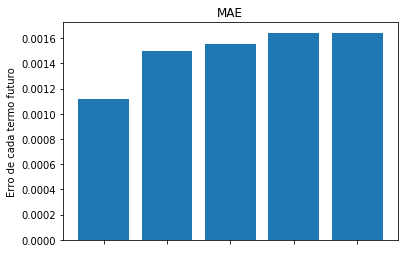

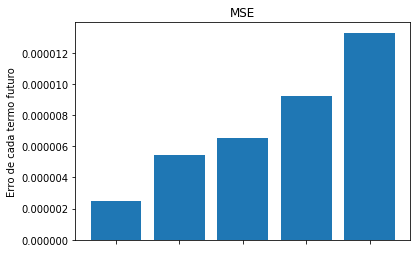

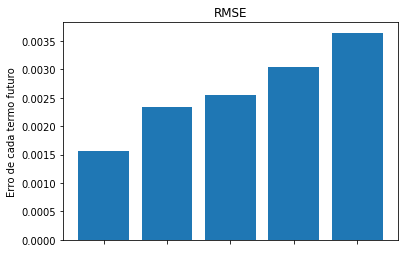

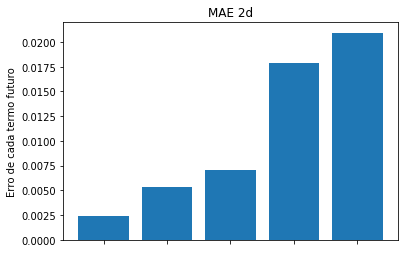

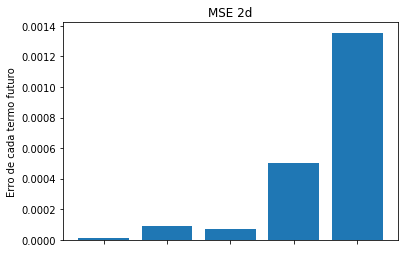

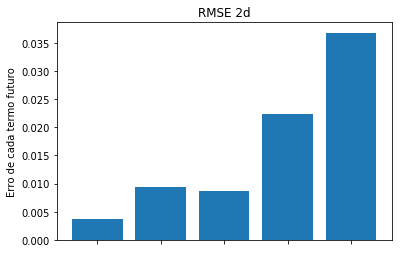

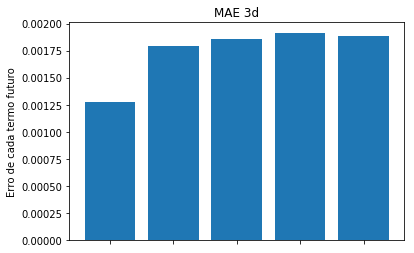

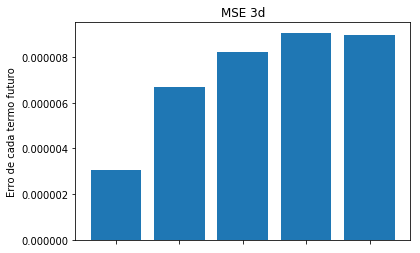

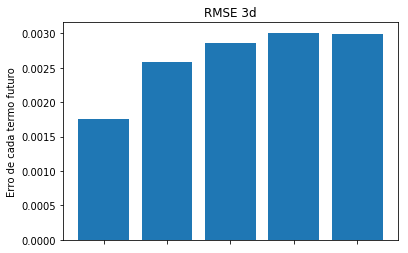

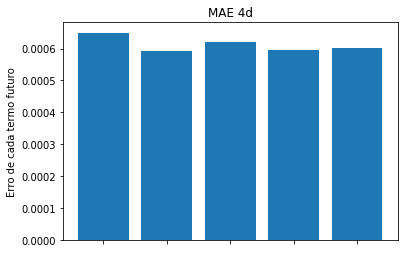

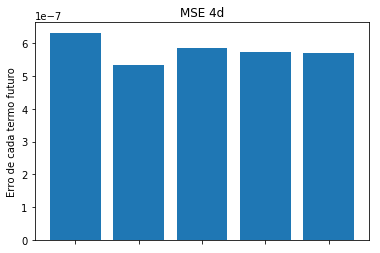

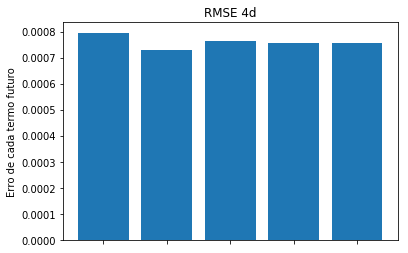

In [19]:

label = []

#plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

In [20]:
for i in range(FUTUREerror.shape[0]):
    #print(FUTUREerror[i],menor[i,3])
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/5)

[ 4.  2.  2.  1.  2.  0.  2.  2.  3. 11.] [721. 395. 327. 295. 284. 286. 327. 345. 426. 956.] [263. 148. 131. 116. 103. 100. 117. 126. 138. 338.]
[0.16546642 0.09127449 0.07703902 0.06900017 0.06514822 0.06464579
 0.07469436 0.07921621 0.09495897 0.21855636] [0.13793103 0.06896552 0.06896552 0.03448276 0.06896552 0.
 0.06896552 0.06896552 0.10344828 0.37931034] [0.16529115 0.09055479 0.07496561 0.06762953 0.06510775 0.06556625
 0.07496561 0.07909216 0.09766162 0.21916552] [0.1664557  0.09367089 0.08291139 0.07341772 0.06518987 0.06329114
 0.07405063 0.07974684 0.08734177 0.21392405]
oi [0.83358928 0.75558368 0.8952024  0.49974891 1.0585941  0.
 0.92330292 0.87059853 1.08939974 1.73552649] [0.99894075 0.99211497 0.97308624 0.9801357  0.99937884 1.01423861
 1.00363155 0.99843401 1.02846129 1.00278722] [1.00597871 1.02625479 1.07622592 1.06402237 1.00063942 0.97904506
 0.9913819  1.00669842 0.91978434 0.97880499]


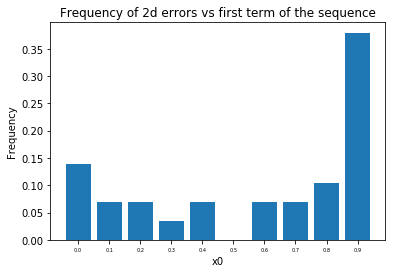

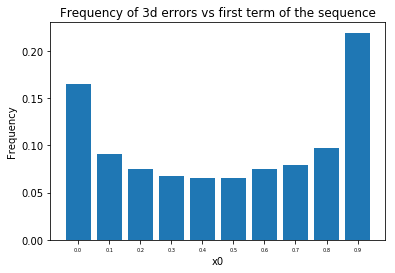

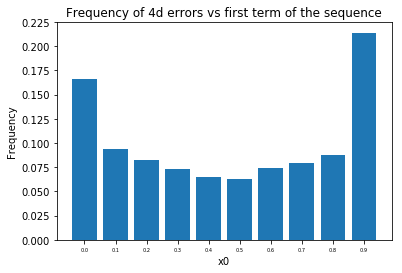

oi [0.83358928 0.75558368 0.8952024  0.49974891 1.0585941  0.
 0.92330292 0.87059853 1.08939974 1.73552649] [0.99894075 0.99211497 0.97308624 0.9801357  0.99937884 1.01423861
 1.00363155 0.99843401 1.02846129 1.00278722] [1.00597871 1.02625479 1.07622592 1.06402237 1.00063942 0.97904506
 0.9913819  1.00669842 0.91978434 0.97880499]


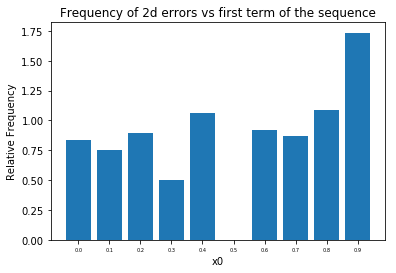

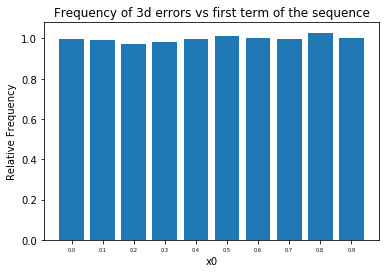

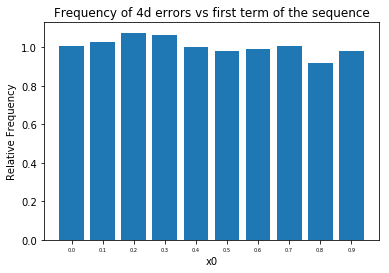

In [21]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 3. 0. 1.
 1. 1. 0. 3.] [117. 115.  80.  62.  72.  78.  53.  58.  46.  40.  44.  33.  41.  41.
  44.  44.  33.  33.  45.  37.  42.  27.  37.  36.  30.  25.  32.  33.
  30.  35.  29.  22.  30.  30.  26.  32.  32.  33.  28.  33.  25.  33.
  34.  30.  21.  19.  31.  29.  35.  27.  37.  26.  32.  25.  24.  31.
  20.  29.  24.  38.  30.  27.  32.  36.  41.  35.  28.  29.  31.  38.
  29.  28.  37.  26.  36.  37.  37.  39.  39.  37.  52.  38.  36.  38.
  40.  43.  38.  45.  50.  46.  50.  53.  50.  57.  60.  81.  89.  94.
 146. 276.] [40. 59. 33. 18. 23. 18. 21. 21. 13. 17. 15. 15. 14. 14. 18. 15. 14.  9.
 20. 14. 16. 13. 11. 12. 20. 11. 14.  9. 11. 14. 16.  9. 12.  8. 10. 15.
 14. 14.  7. 11. 13. 12.  8.  9.  7. 11

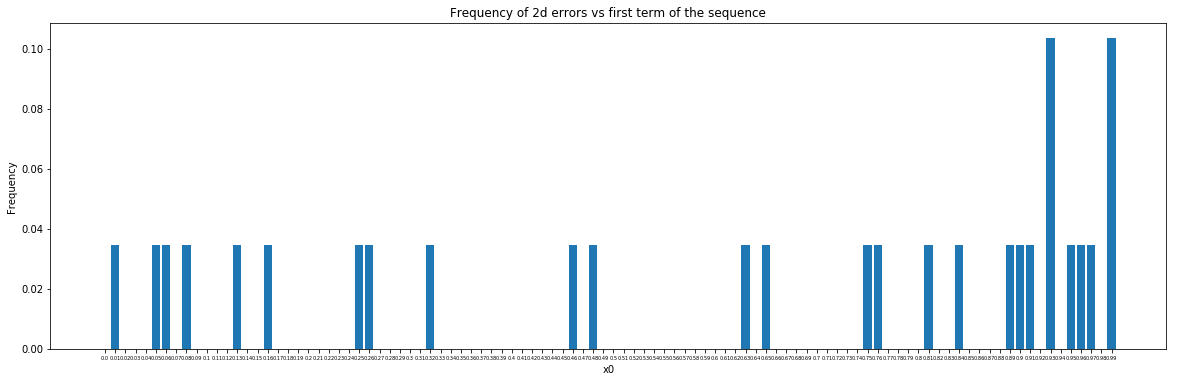

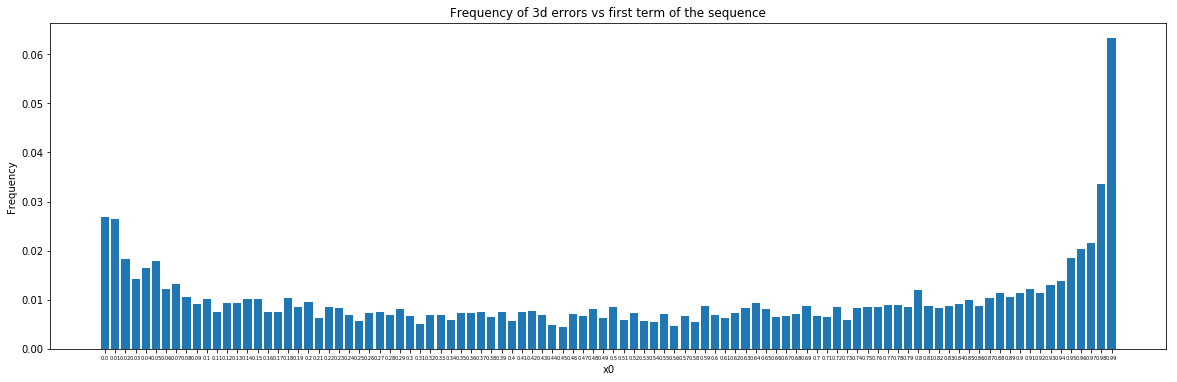

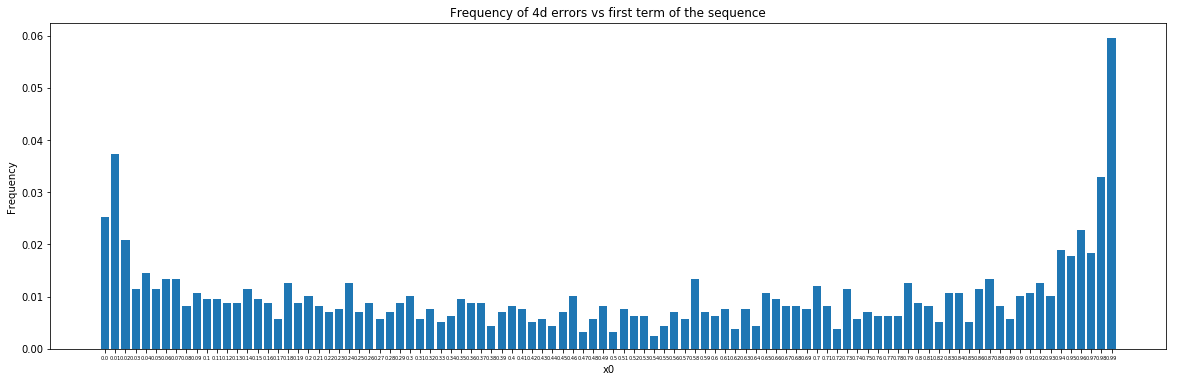

oi [0.         1.17655172 0.         0.         0.         2.12264486
 2.74528736 0.         3.4316092  0.         0.         0.
 0.         3.67672414 0.         0.         4.28951149 0.
 0.         0.         0.         0.         0.         0.
 0.         5.56477167 4.3807777  0.         0.         0.
 0.         0.         4.7882919  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         4.28951149 0.
 4.57547893 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         4.20197044 0.         3.8848406
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         4.20197044 4.28951149 0.
 0.         0.         0.         3.95954907 0.         0.
 3.54994055 0.         0.         0.         0.         3.67672414
 3.07308286 2.89995143 0.         8.12749546 0.         1.87178683
 1.63409962 1.66045606

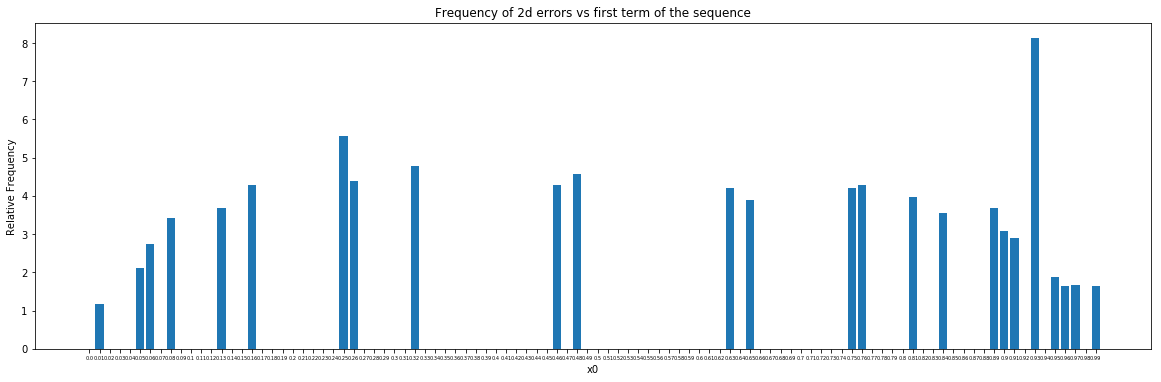

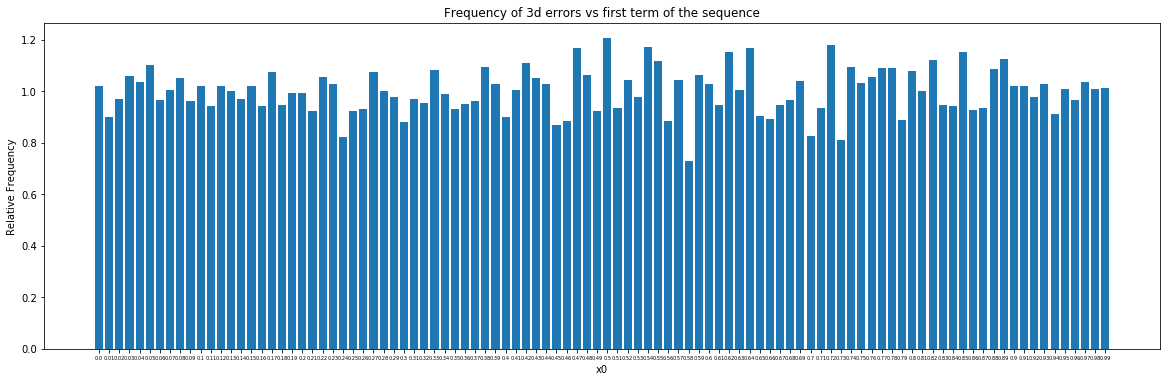

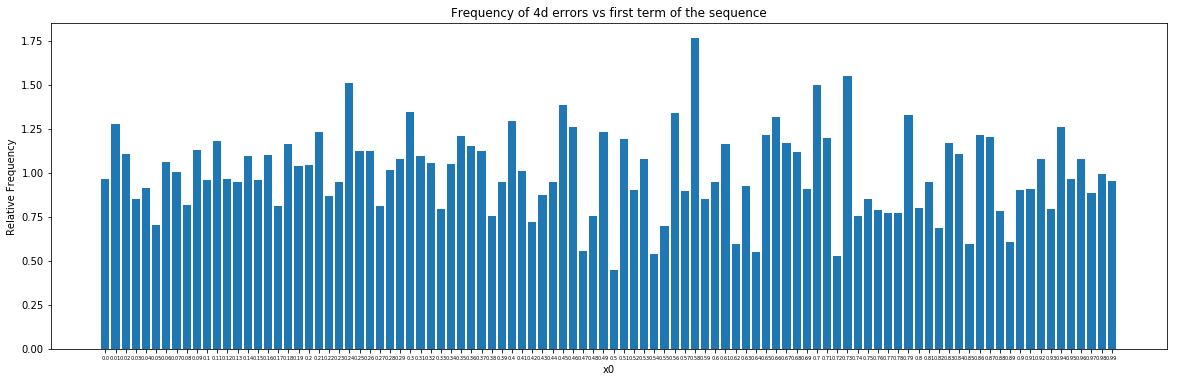

In [22]:
div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


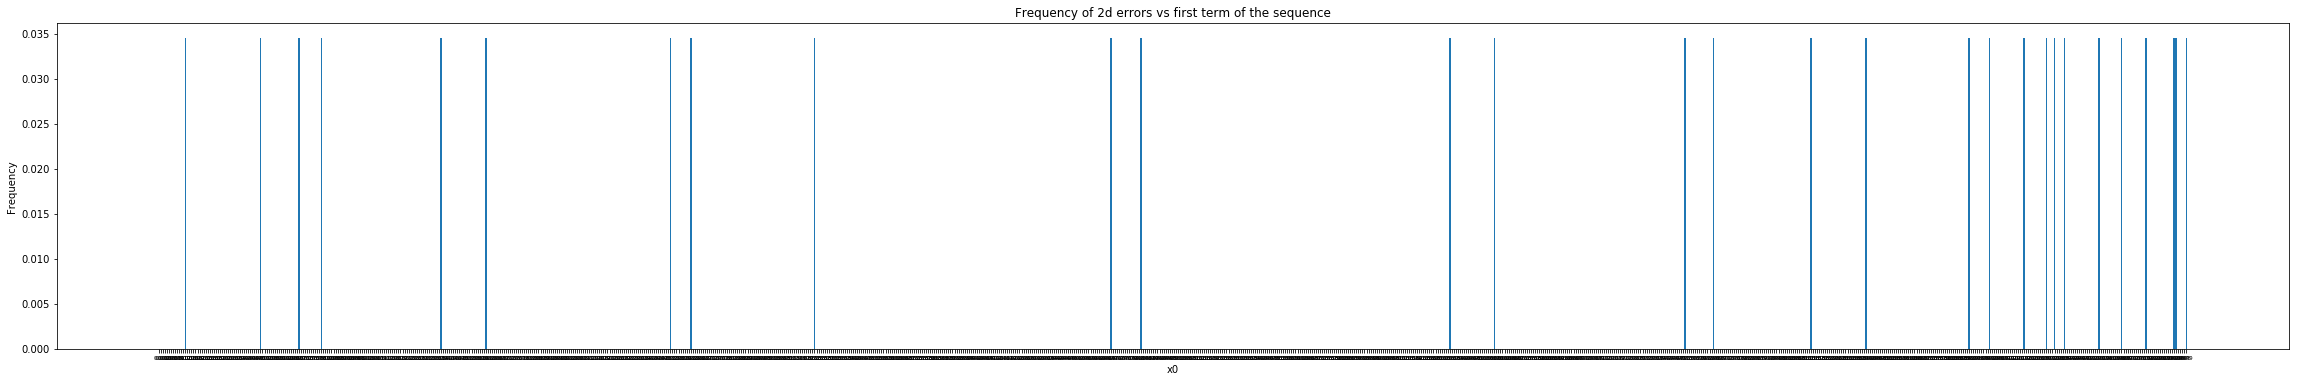

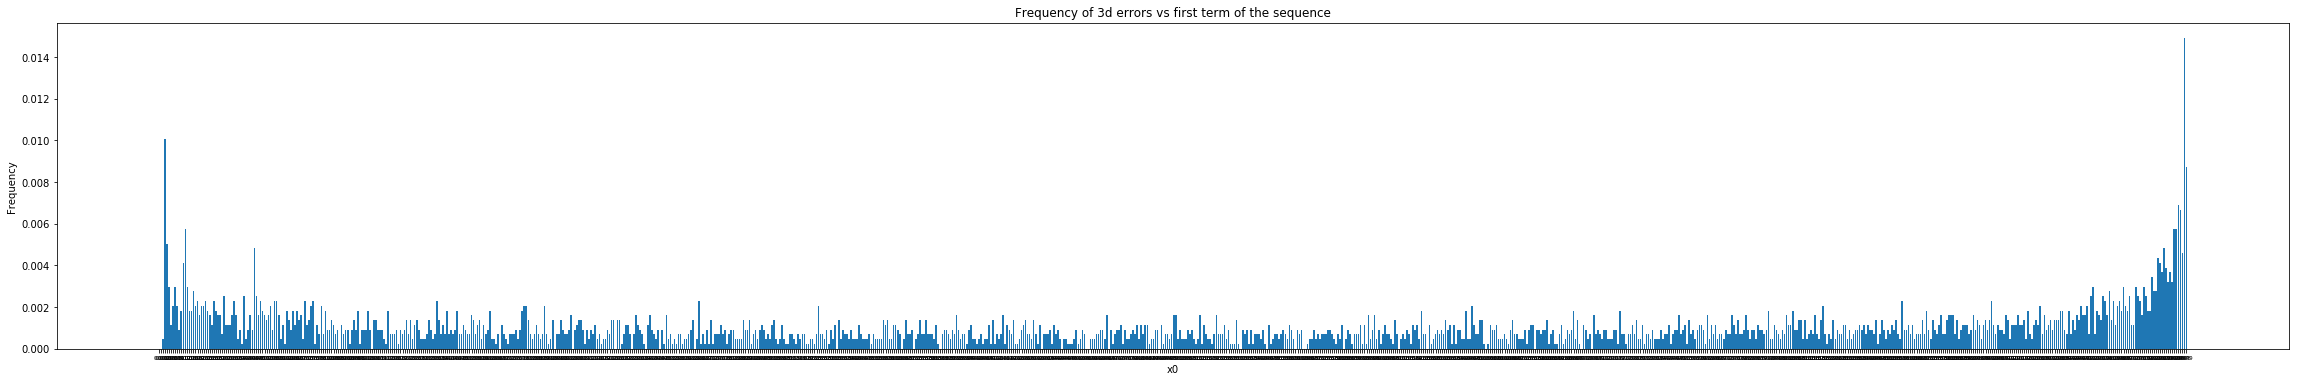

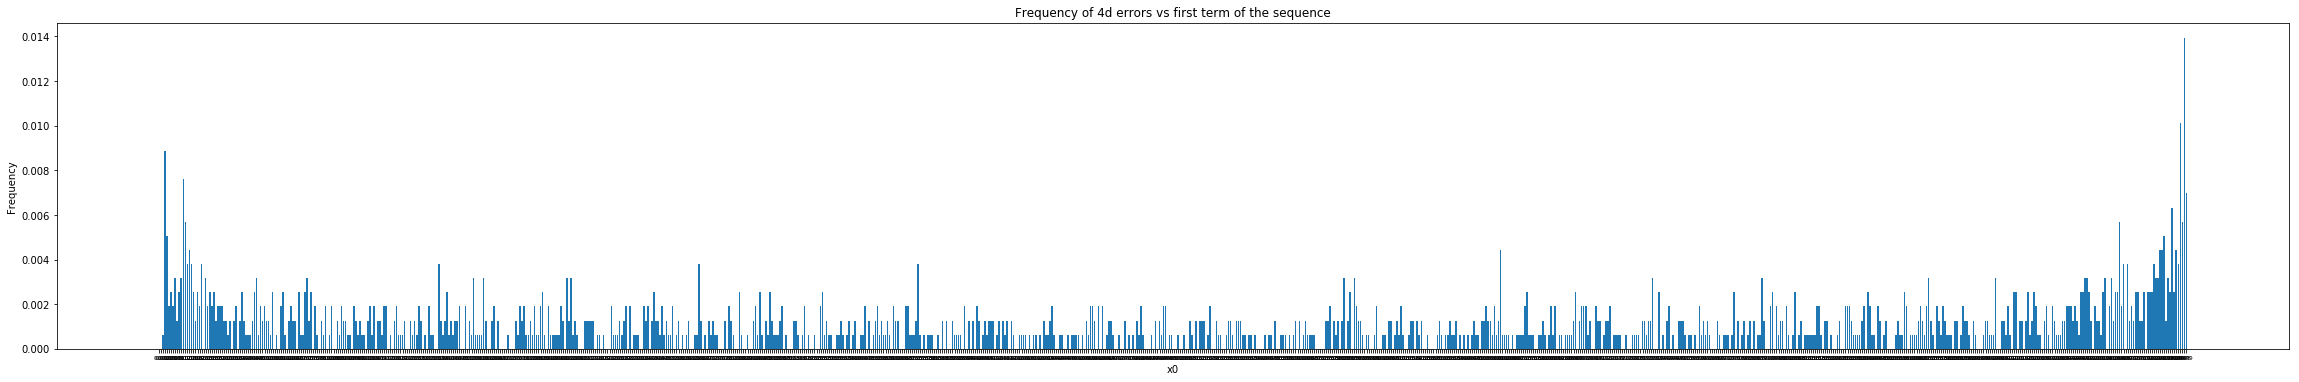

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


oi [        nan         nan  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          5.88275862  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         14.70689655  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         18.71786834  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         17.15804598  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.      

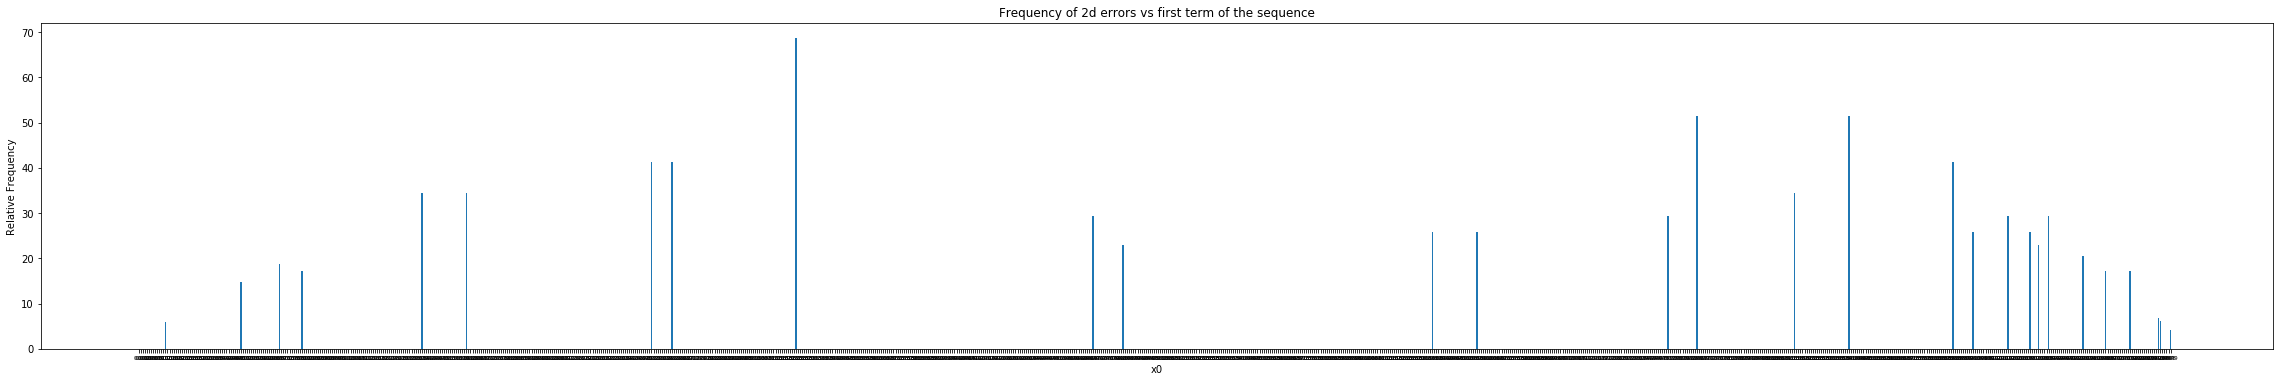

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


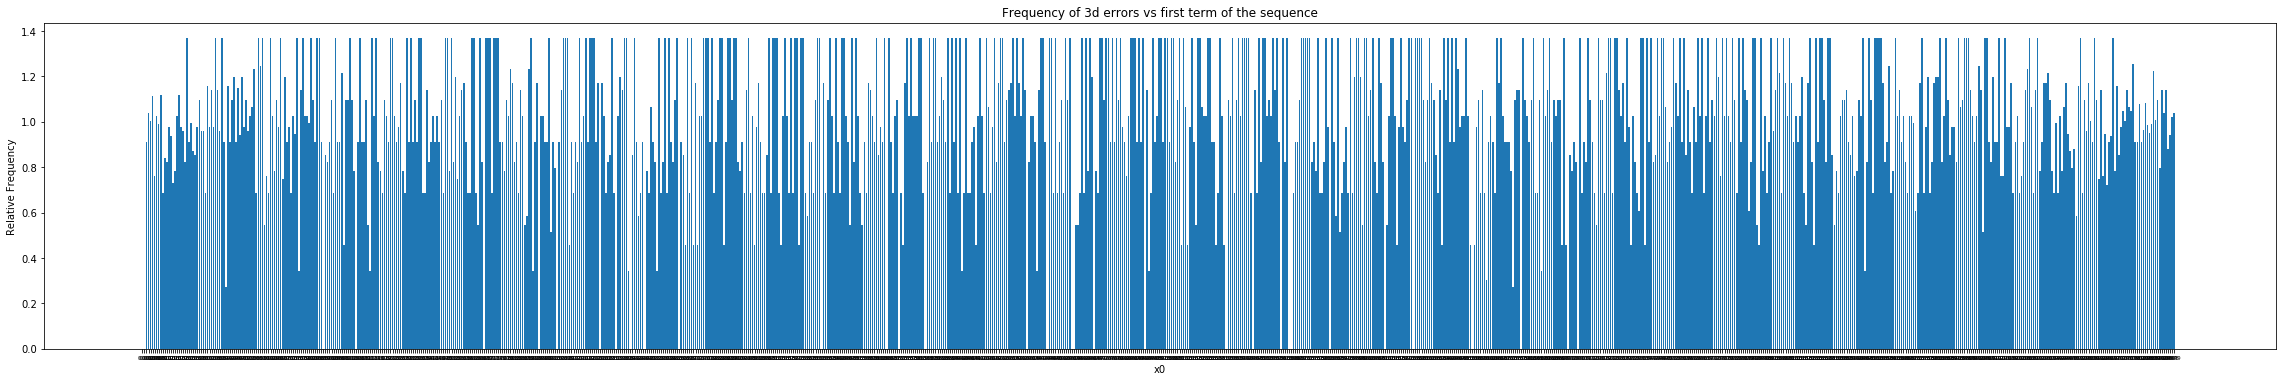

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


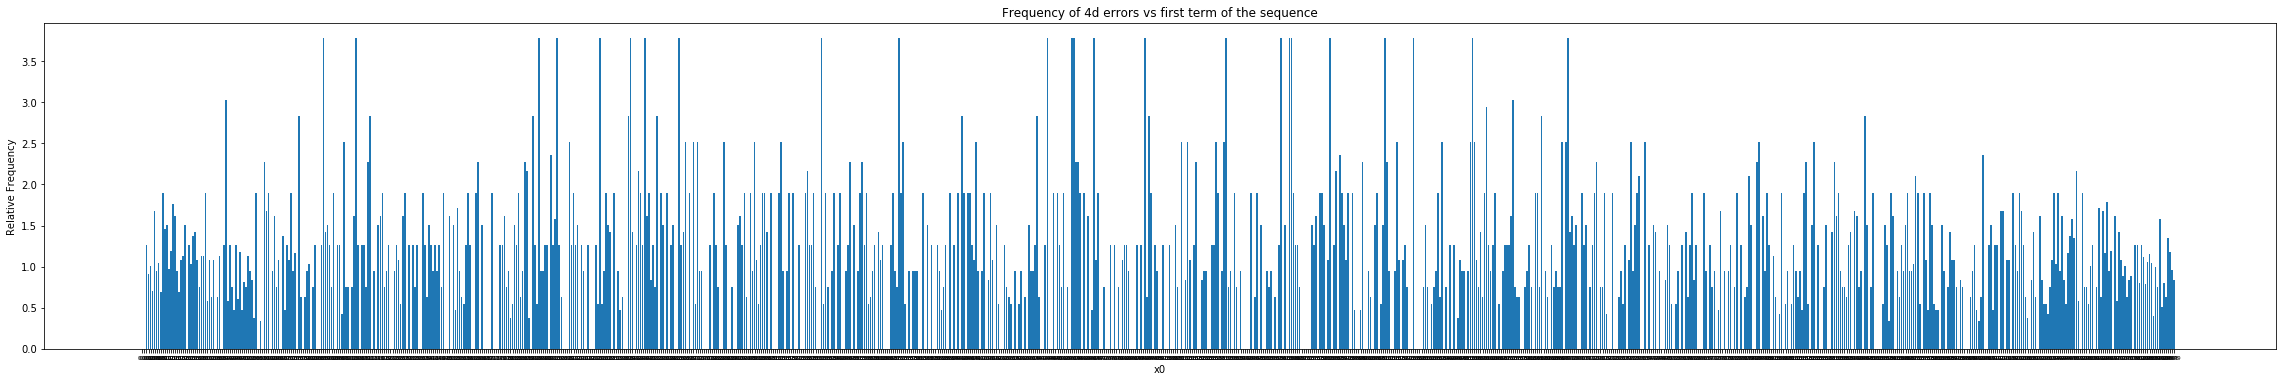

In [23]:
div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

mae [0.0011154800114265503, 0.0014952133620287026, 0.0015568658819004467, 0.0016440962571920093] 
 mse [2.466843124667823e-06, 5.452808740817765e-06, 6.5151142603923585e-06, 9.206703900507326e-06] 
 rmse [0.0015706187076015054, 0.0023351249946882424, 0.002552472186017383, 0.003034255081648101] 

mae [0.002364099266758942, 0.005366061246713004, 0.007014610648056401, 0.017925428408747397] 
 mse [1.3073074145124822e-05, 8.752421777161084e-05, 7.384668719324011e-05, 0.0005007272369434742] 
 rmse [0.003615670635597886, 0.009355437871719894, 0.008593409520861909, 0.02237693537872142] 

mae [0.001275943634183885, 0.0017963852003010398, 0.0018594271065336327, 0.001915782811748806] 
 mse [3.0607186794527318e-06, 6.688895696497846e-06, 8.215586744106807e-06, 9.066068538540875e-06] 
 rmse [0.001749490977242447, 0.0025862899482652457, 0.0028662844841548453, 0.003010991288353534] 

mae [0.001275943634183885, 0.0017963852003010398, 0.0018594271065336327, 0.001915782811748806] 
 mse [3.06071867945273

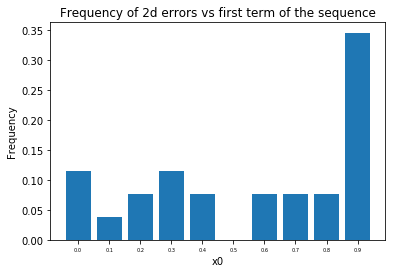

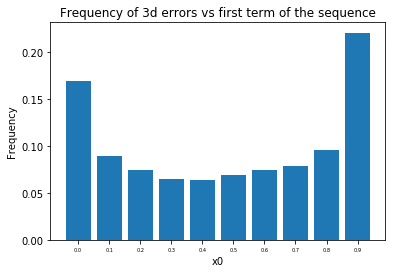

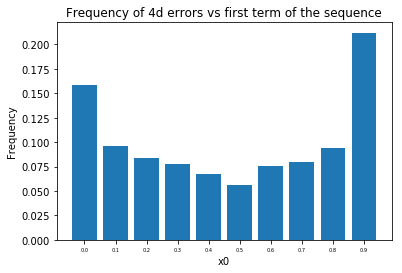

oi [0.69732949 0.4213832  0.99849498 1.67223674 1.18073957 0.
 1.02983788 0.9710522  0.81006648 1.58381963] [1.01988081 0.98255023 0.96070238 0.94335438 0.98432918 1.06656432
 0.99731407 0.99516464 1.00535733 1.00929682] [0.95848851 1.04865091 1.09073214 1.1210283  1.03355779 0.86081869
 1.00576821 1.01158026 0.99038177 0.97009319]


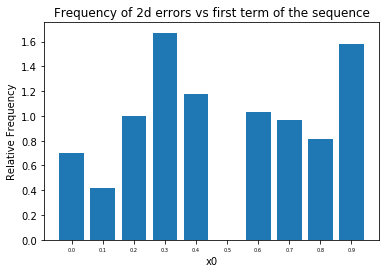

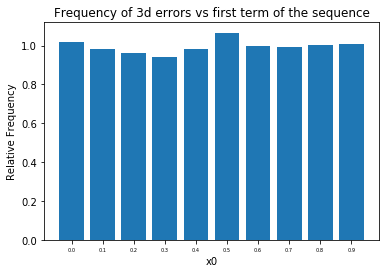

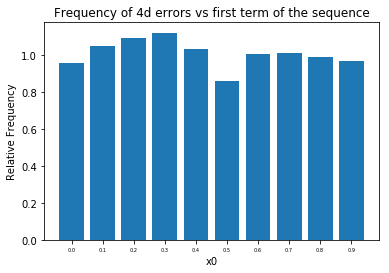

[1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 2. 0. 0.
 0. 1. 1. 3.] [114. 113.  76.  59.  71.  73.  52.  57.  46.  39.  42.  30.  37.  35.
  42.  42.  33.  31.  48.  32.  38.  26.  36.  32.  31.  23.  28.  31.
  28.  34.  28.  18.  26.  30.  23.  27.  29.  28.  30.  31.  21.  30.
  31.  29.  19.  19.  31.  26.  35.  25.  37.  23.  31.  26.  23.  31.
  20.  31.  27.  37.  26.  23.  29.  34.  38.  31.  25.  30.  34.  39.
  29.  28.  35.  27.  35.  36.  33.  35.  34.  35.  48.  35.  31.  35.
  38.  37.  34.  43.  51.  44.  45.  52.  47.  56.  59.  77.  87.  84.
 137. 271.] [42. 61. 37. 21. 24. 23. 23. 22. 14. 18. 17. 18. 18. 20. 20. 17. 15. 11.
 17. 19. 20. 14. 12. 15. 19. 13. 19. 11. 13. 15. 17. 13. 16.  8. 13. 19.
 17. 18.  5. 13. 17. 15. 10. 10.  9. 11

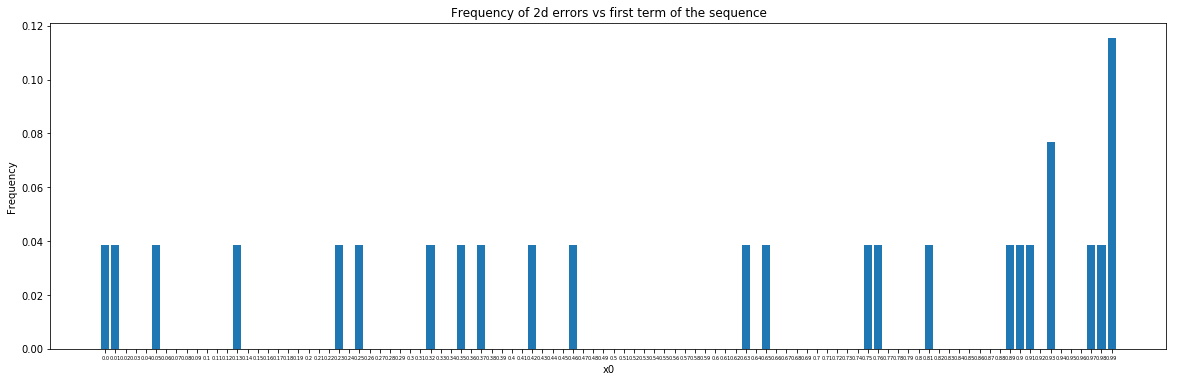

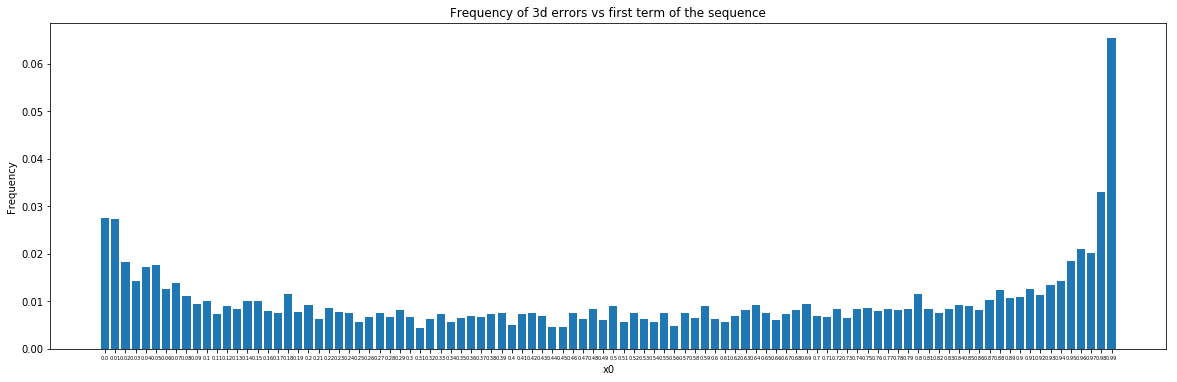

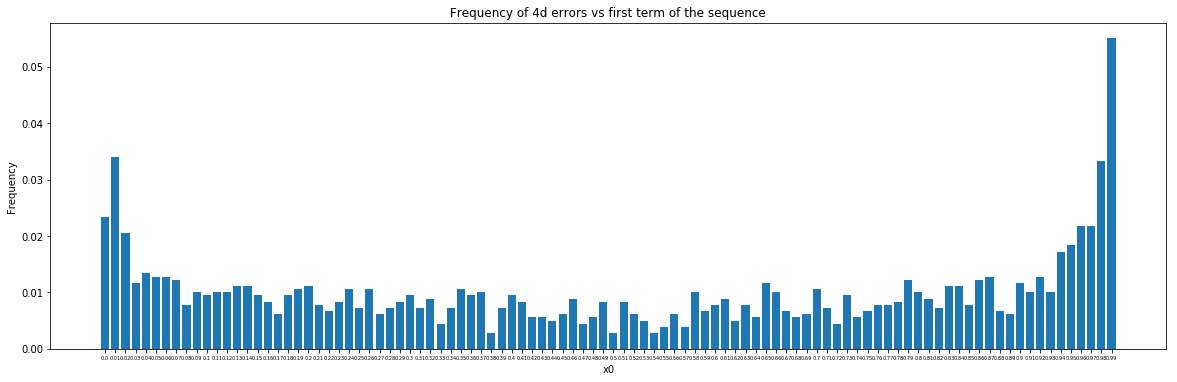

oi [1.46276335 1.31230769 0.         0.         0.         2.36756542
 0.         0.         0.         0.         0.         0.
 0.         4.10096154 0.         0.         0.         0.
 0.         0.         0.         0.         0.         4.78445513
 0.         6.20686071 0.         0.         0.         0.
 0.         0.         5.34078712 0.         0.         4.88625205
 0.         4.88625205 0.         0.         0.         0.
 5.46794872 0.         0.         0.         4.78445513 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         4.68681319 0.         4.33309144
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         4.68681319 4.78445513 0.
 0.         0.         0.         4.41642012 0.         0.
 0.         0.         0.         0.         0.         4.10096154
 3.42766935 3.23456121 0.         6.04352227 0.         0.
 0.         1

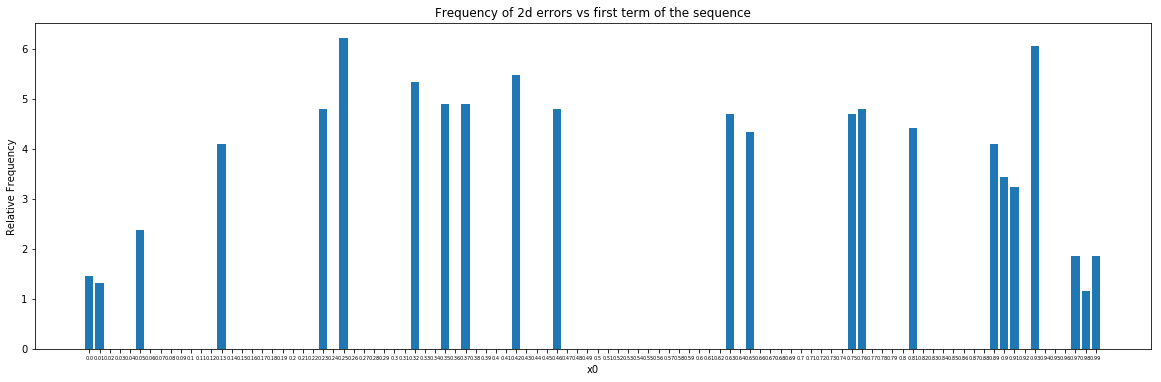

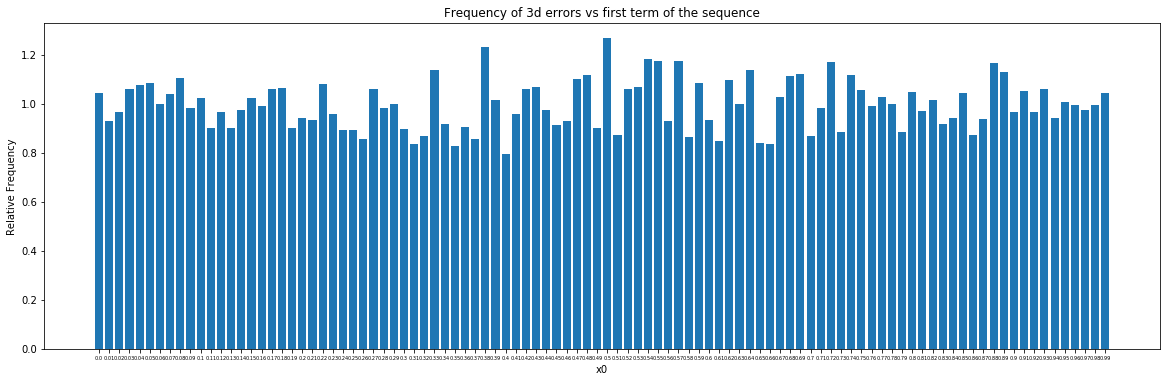

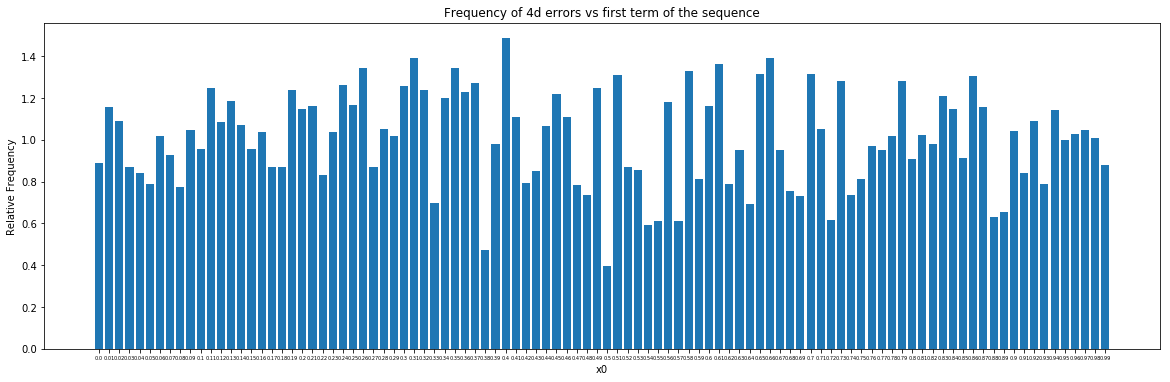

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in true_divide


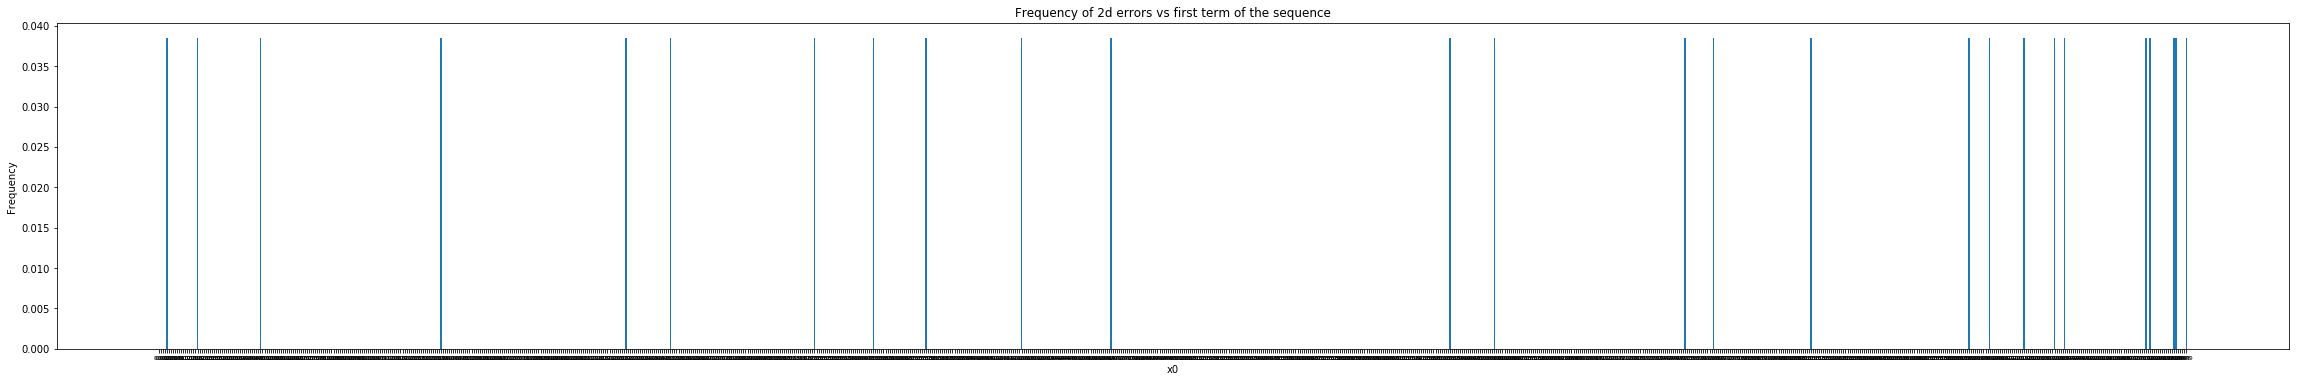

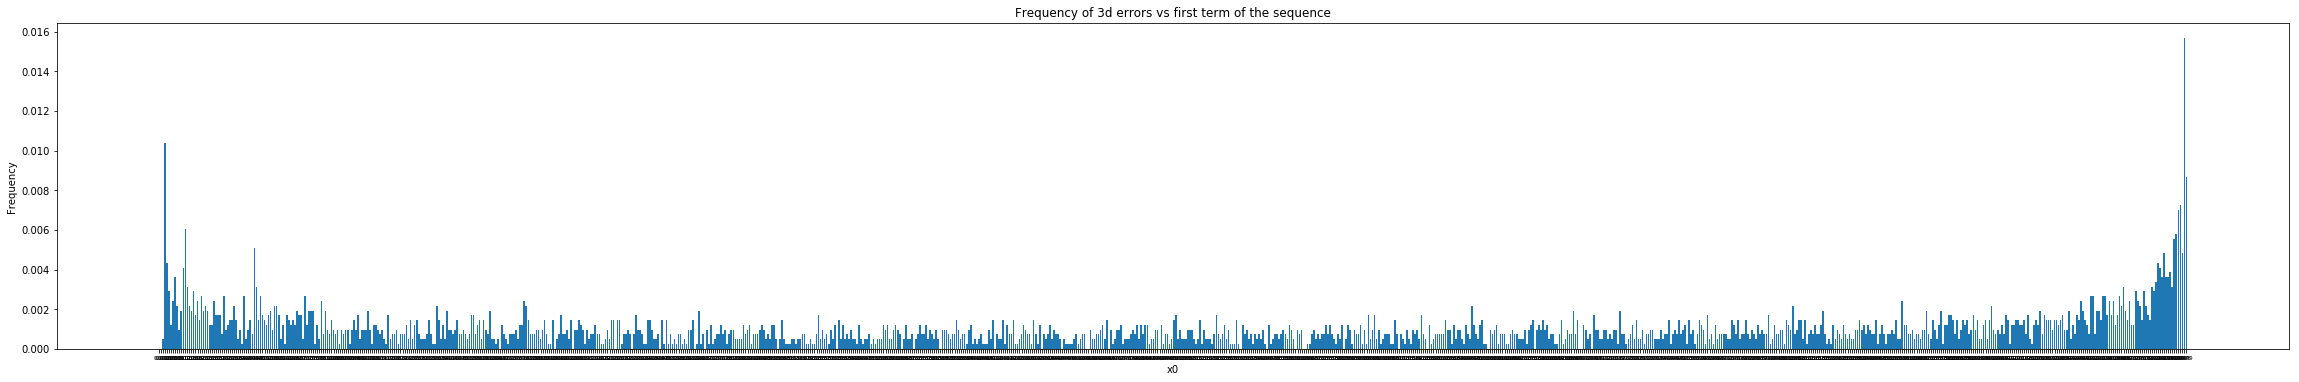

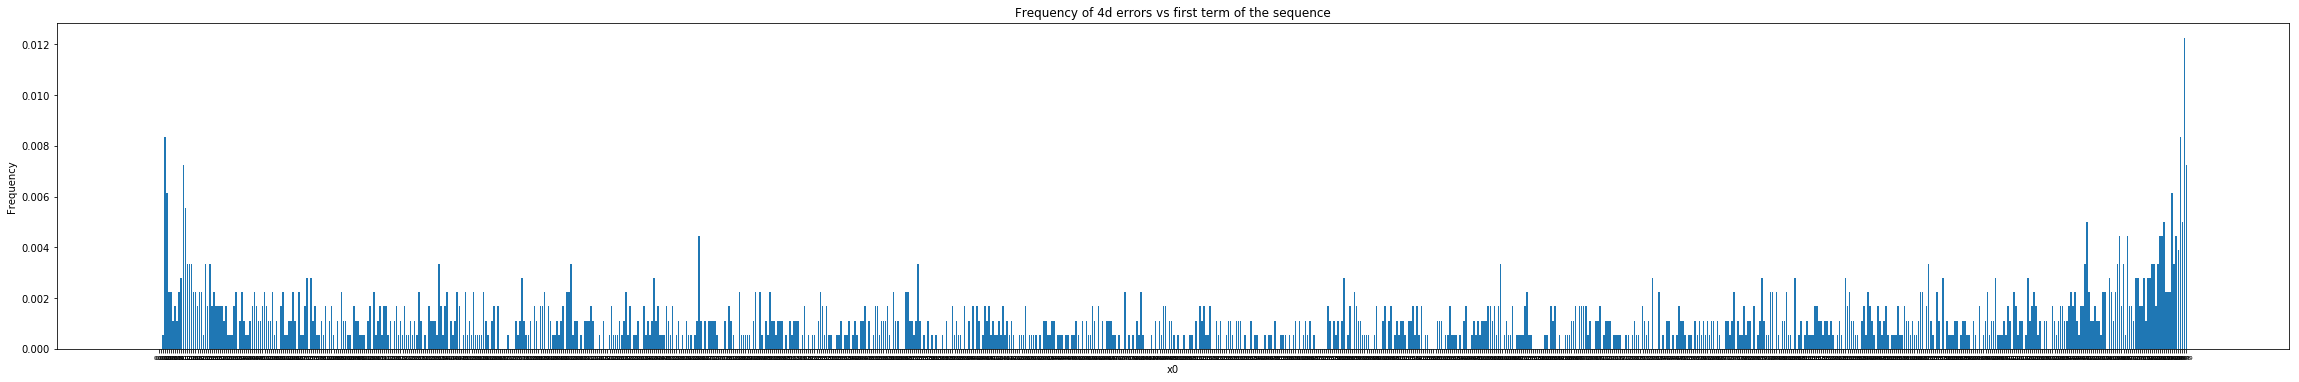

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:258: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:260: RuntimeWarning: invalid value encountered in true_divide


oi [        nan         nan  0.          0.          7.65512821  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         16.40384615  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         16.40384615  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.      

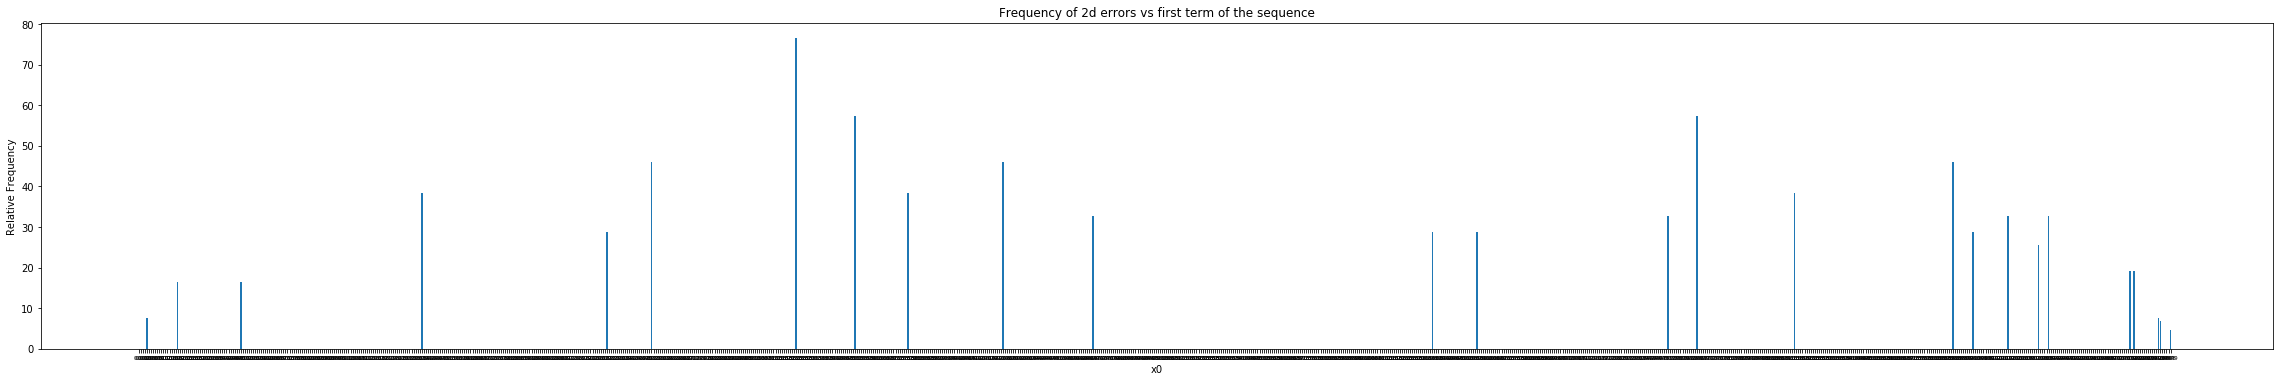

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:268: RuntimeWarning: invalid value encountered in true_divide


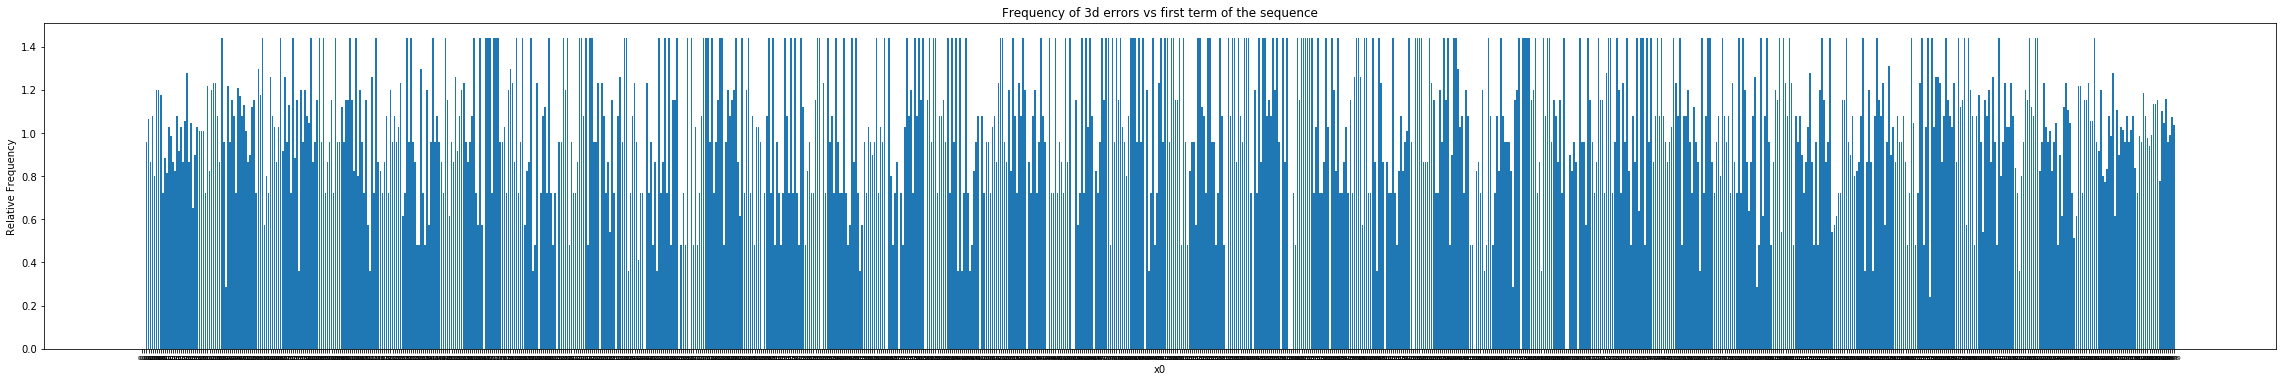

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:276: RuntimeWarning: invalid value encountered in true_divide


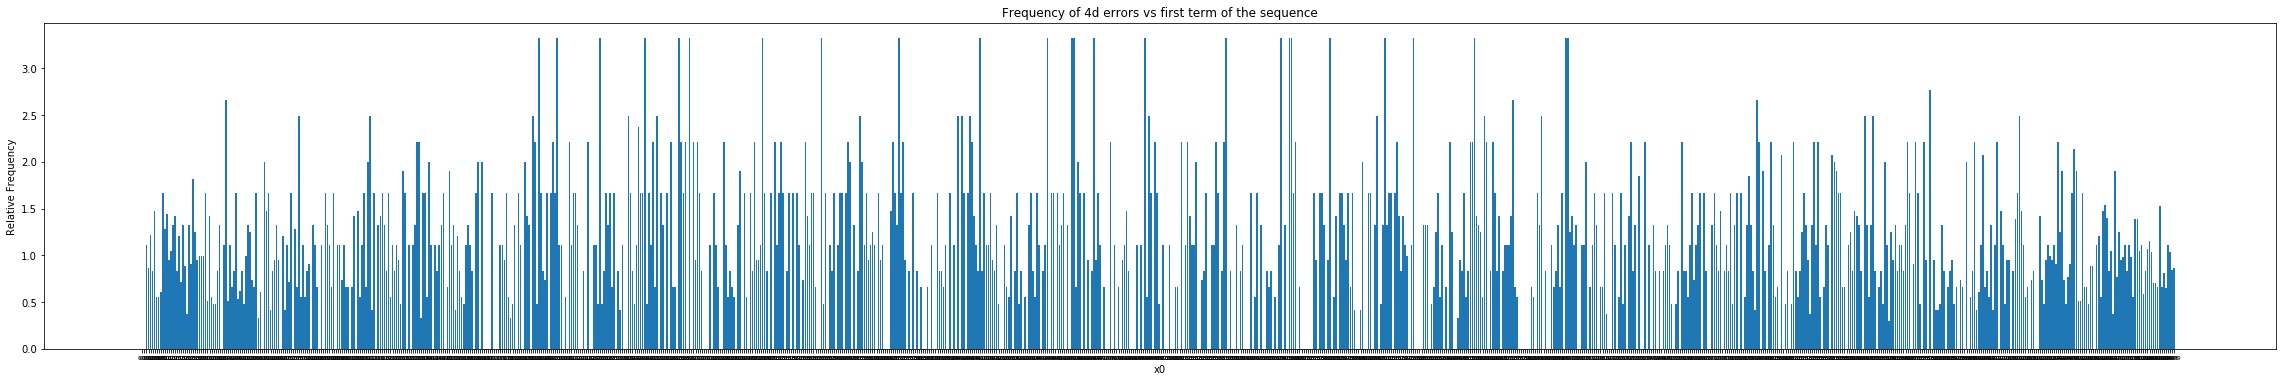

In [24]:
FUTUREerror = FUTUREerror[:,0:4]
FUTUREerror2d = FUTUREerror2d[:,0:4]
FUTUREerror3d = FUTUREerror3d[:,0:4]
FUTUREerror4d = FUTUREerror4d[:,0:4]
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/4)
    
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()